In [335]:
import numpy as np
import pandas as pd

In [336]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [337]:
df.sample(5)

v1                                                 v2  \
4876   ham  The world's most happiest frnds never have the...   
1428   ham  Tell you what, if you make a little spreadshee...   
5264   ham  Storming msg: Wen u lift d phne, u say \HELLO\...   
5270   ham  Did u fix the teeth?if not do it asap.ok take ...   
263   spam  Hey I am really horny want to chat or see me n...   

                                             Unnamed: 2 Unnamed: 3 Unnamed: 4  
4876                                                NaN        NaN        NaN  
1428                                      I'll come up"        NaN        NaN  
5264   bt not his girlfrnd... G o o d n i g h t . . .@"        NaN        NaN  
5270                                                NaN        NaN        NaN  
263                                                 NaN        NaN        NaN

In [338]:
df.shape

(5572, 5)

In [339]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [341]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [342]:
df.sample(5)

v1                                                 v2
3803   ham  No dude, its not fake..my frnds got money, tht...
1772   ham  Good afternoon sexy buns! How goes the job sea...
3718  spam  Thanks for your ringtone order, reference numb...
882    ham  I love to give massages. I use lots of baby oi...
1246   ham  I do know what u mean,  is the king of not hav...

In [343]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
3832    ham  I had askd u a question some hours before. Its...
1176    ham  Did he say how fantastic I am by any chance, o...
1136   spam  Dont forget you can place as many FREE Request...
2707   spam  Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
298     ham  I cant pick the phone right now. Pls send a me...

In [344]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [345]:
df['target'] = encoder.fit_transform(df['target'])

In [346]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [347]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [348]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [349]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [350]:
df.duplicated().sum()

np.int64(0)

In [351]:
df.shape

(5169, 2)

## 2.EDA

In [352]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [353]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

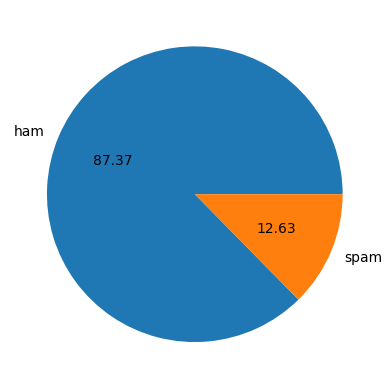

In [354]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [355]:
# Data is imbalanced

In [356]:
import nltk

In [357]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikithajos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [358]:
df['num_characters'] = df['text'].apply(len)

In [359]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [360]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [361]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [362]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [363]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [364]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [365]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [366]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [367]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

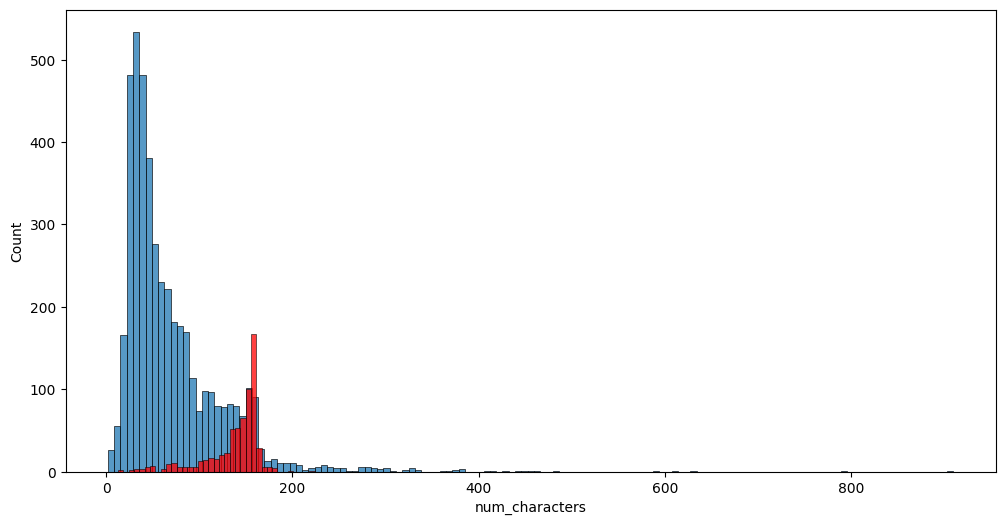

In [368]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

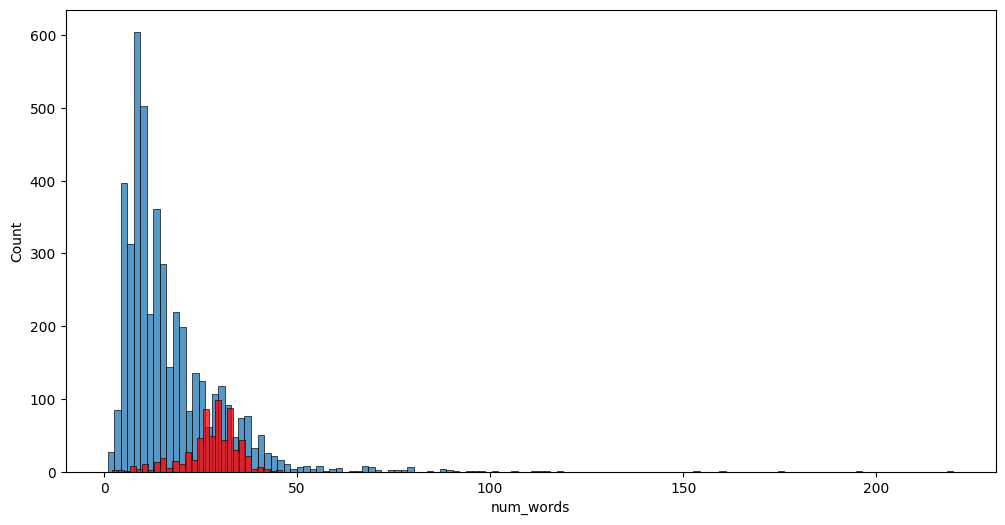

In [369]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

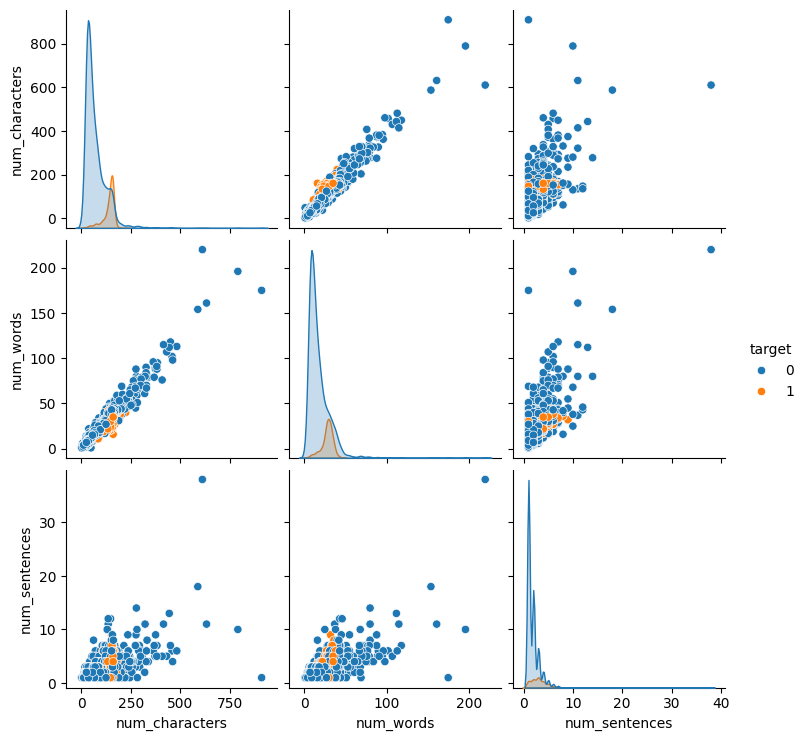

In [370]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [371]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikithajos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [372]:
import nltk
import string
from nltk.corpus import stopwords # Import the stopwords module
import nltk
import string
from nltk.corpus import stopwords # Import the stopwords module
from nltk.stem import PorterStemmer


# Assuming ps is an instance of PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Now stopwords is properly accessed
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)


In [373]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [374]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [375]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [376]:
df['transformed_text'] = df['text'].apply(transform_text)

In [377]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [378]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [379]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

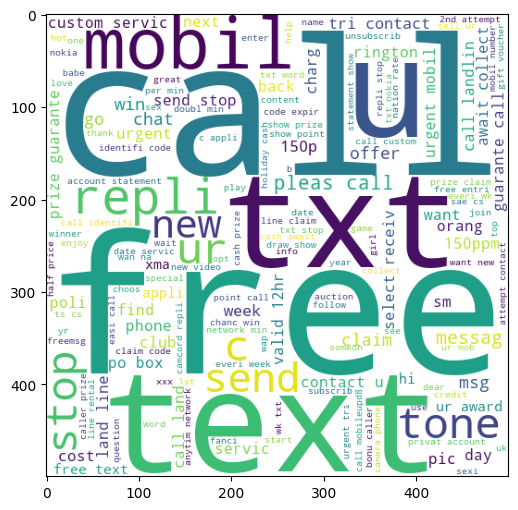

In [380]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [381]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

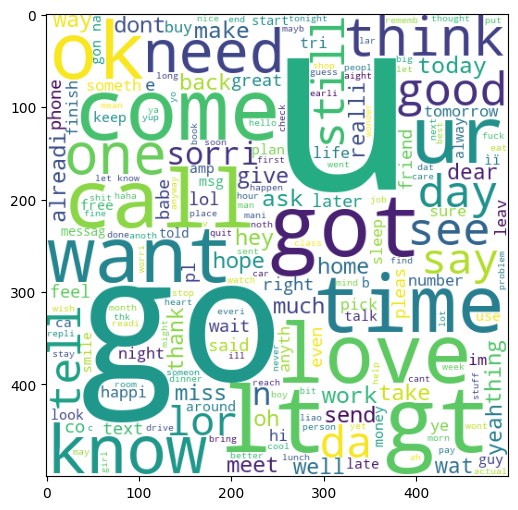

In [382]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [383]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [384]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [385]:
len(spam_corpus)

9939

In [386]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [387]:
len(ham_corpus)

35404

In [388]:
# Text Vectorization
# using Bag of Words
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

## 4. Model Building

In [389]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [390]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [391]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [392]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [393]:
X.shape

(5169, 3000)

In [394]:
y = df['target'].values

In [395]:
from sklearn.model_selection import train_test_split

In [396]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [397]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [398]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [399]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [400]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [401]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [403]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [404]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [405]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [406]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [407]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.97678916827853
Precision -  0.975


C:\Users\nikithajos\Desktop\sms\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9732142857142857
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.967479674796748
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612


In [408]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [409]:
performance_df

Algorithm  Accuracy  Precision
1         KN  0.905222   1.000000
2         NB  0.970986   1.000000
5         RF  0.976789   0.975000
0        SVC  0.975822   0.974790
6   AdaBoost  0.969052   0.973214
4         LR  0.956480   0.969697
8        ETC  0.977756   0.967480
10       xgb  0.968085   0.933884
9       GBDT  0.950677   0.930693
7        BgC  0.959381   0.869231
3         DT  0.929400   0.828283

In [410]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [411]:
performance_df1

Algorithm   variable     value
0         KN   Accuracy  0.905222
1         NB   Accuracy  0.970986
2         RF   Accuracy  0.976789
3        SVC   Accuracy  0.975822
4   AdaBoost   Accuracy  0.969052
5         LR   Accuracy  0.956480
6        ETC   Accuracy  0.977756
7        xgb   Accuracy  0.968085
8       GBDT   Accuracy  0.950677
9        BgC   Accuracy  0.959381
10        DT   Accuracy  0.929400
11        KN  Precision  1.000000
12        NB  Precision  1.000000
13        RF  Precision  0.975000
14       SVC  Precision  0.974790
15  AdaBoost  Precision  0.973214
16        LR  Precision  0.969697
17       ETC  Precision  0.967480
18       xgb  Precision  0.933884
19      GBDT  Precision  0.930693
20       BgC  Precision  0.869231
21        DT  Precision  0.828283

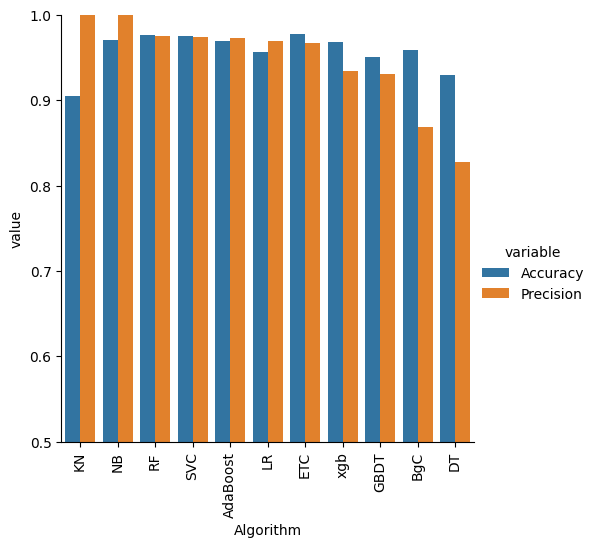

In [412]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [413]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [414]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [415]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [416]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [417]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [418]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [419]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_scaling_x  Precision_scaling_x  \
0         KN  0.905222   1.000000            0.905222             1.000000   
1         NB  0.970986   1.000000            0.970986             1.000000   
2         RF  0.976789   0.975000            0.976789             0.975000   
3        SVC  0.975822   0.974790            0.975822             0.974790   
4   AdaBoost  0.969052   0.973214            0.969052             0.973214   
5         LR  0.956480   0.969697            0.956480             0.969697   
6        ETC  0.977756   0.967480            0.977756             0.967480   
7        xgb  0.968085   0.933884            0.968085             0.933884   
8       GBDT  0.950677   0.930693            0.950677             0.930693   
9        BgC  0.959381   0.869231            0.959381             0.869231   
10        DT  0.929400   0.828283            0.929400             0.828283   

    Accuracy_scaling_y  Precision_scaling_y  Accuracy_num_chars  \
0             0.905222             1.000000            0.905222   
1             0.970986             1.000000            0.970986   
2             0.976789             0.975000            0.976789   
3             0.975822             0.974790            0.975822   
4             0.969052             0.973214            0.969052   
5             0.956480             0.969697            0.956480   
6             0.977756             0.967480            0.977756   
7             0.968085             0.933884            0.968085   
8             0.950677             0.930693            0.950677   
9             0.959381             0.869231            0.959381   
10            0.929400             0.828283            0.929400   

    Precision_num_chars  
0              1.000000  
1              1.000000  
2              0.975000  
3              0.974790  
4              0.973214  
5              0.969697  
6              0.967480  
7              0.933884  
8              0.930693  
9              0.869231  
10             0.828283

In [420]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [423]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [429]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [430]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [431]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [437]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))